# Install the ucimlrepo package and import libraries

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Set the random seed
np.random.seed(1234)

# Load and Preprocess the Dataset 1 for KNN
*   Shape of X: (2278, 10)
*   Shape of y: (2278, 1)

In [ ]:
# Dataset 1: NHANES age prediction.csv
#(National Health and Nutrition Health Sur- vey 2013-2014 (NHANES) Age Prediction Subset)
df1 = pd.read_csv('./dataset/NHANES_age_prediction.csv') # Change it to wherever you store your dataset

# Basic information of df1
# Clean the dataset
df1.isnull().sum()
print("Note: There is no missing value.\n")

# Drop duliplicate
df1.drop_duplicates(inplace=True)

df1.info()

X = df1[['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']].values
y = pd.get_dummies(df1['age_group']).values # One-hot encoding (Change the categorial y into integer array)

#added to get the correleation of the features with the target groups for KNN feature selection
df1['Adult'] = y[:,0]
df1['Senior'] = y[:,1]
df1 = df1.drop('RIDAGEYR',axis=1)
df1 = df1.drop('SEQN',axis=1)
correlation_matrix = df1.corr().abs()
abs_correlation_with_target = correlation_matrix["Adult"]

# Set the threshold (adjust as needed)
threshold = 0.008

# Select features with absolute correlation above the threshold
selected_features = abs_correlation_with_target[(1 > abs_correlation_with_target) & (abs_correlation_with_target > threshold)].index

print("Selected Features:", selected_features)
X_selected_features = df1[selected_features].values

# .values: Change the panda dataframe to numpy array

# Print the feature shape and classes of dataset
(N,D), C = X.shape, np.unique(y)
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

#generates an indices array from 0 to N-1 and permutes it
inds = np.random.permutation(N)

train_split, validate_split, test_split = 0.33, 0.33, 0.33

# Calculate the indices for each split
train_end = int(len(X) * train_split)
validate_end = int(len(X) * (train_split + validate_split))

# Split the data
x_train_1, y_train_1 = X[inds[:train_end]], y[inds[:train_end]]
x_validate_1, y_validate_1 = X[inds[train_end:validate_end]], y[inds[train_end:validate_end]]
x_test_1, y_test_1 = X[inds[validate_end:]], y[inds[validate_end:]]

# Calculate the mean and standard deviation of each feature in the training set
mean = np.mean(x_train_1, axis=0)
std = np.std(x_train_1, axis=0)

# Standardize the training data
x_train_1 = (x_train_1 - mean) / std

# Standardize the validation and test data using the same mean and std
x_validate_1 = (x_validate_1 - mean) / std
x_test_1 = (x_test_1 - mean) / std


#selected features

# Split the data
x_train_1_sf, y_train_1_sf = X_selected_features[inds[:train_end]], y[inds[:train_end]]
x_validate_1_sf, y_validate_1_sf = X_selected_features[inds[train_end:validate_end]], y[inds[train_end:validate_end]]
x_test_1_sf, y_test_1_sf = X_selected_features[inds[validate_end:]], y[inds[validate_end:]]

# Calculate the mean and standard deviation of each feature in the training set
mean = np.mean(x_train_1_sf, axis=0)
std = np.std(x_train_1_sf, axis=0)

# Standardize the training data
x_train_1_sf = (x_train_1_sf - mean) / std

# Standardize the validation and test data using the same mean and std
x_validate_1_sf = (x_validate_1_sf - mean) / std
x_test_1_sf = (x_test_1_sf - mean) / std


Note: There is no missing value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 195.8+ KB
Selected Features: Index(['PAQ605', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'], dtype='object')
instances (N) 	 2278 
 features (D) 	 7 
 classes (C) 	 [0 1]


<ipython-input-41-14aae9b4f7dc>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr().abs()


# Load and Preprocess the Dataset 1 for DT

In [ ]:
dataset1 = fetch_ucirepo(id=887)
X = dataset1.data.features
y = dataset1.data.targets
df1 = pd.concat([X,y], axis = 1)
df1 = df1.dropna()
df1 = df1.drop_duplicates()

temp = np.array_split(df1, 3)
df1_train = temp[2]
df1_validate = temp[1]
df1_test = temp[0]

feature_list_1 = df1.columns.tolist()
column_list = feature_list_1[:]
feature_list_1.pop()

print(feature_list_1)

# Feature Means and Squared Differences of the Group Means

adult_rows = df1[df1['age_group'] == 'Adult']
adult_means = adult_rows.mean()

senior_rows = df1[df1['age_group'] == 'Senior']
senior_means = senior_rows.mean()

print("Squared Difference of the Group Means")
squared_diffs = (adult_means - senior_means)**2
print(squared_diffs)

['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
Squared Difference of the Group Means
RIAGENDR      0.000014
PAQ605        0.010645
BMXBMI        0.006728
LBXGLU       32.318625
DIQ010        0.000179
LBXGLT      974.575736
LBXIN         2.894810
dtype: float64


<ipython-input-31-9e91d2ca3be2>:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  adult_means = adult_rows.mean()
<ipython-input-31-9e91d2ca3be2>:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  senior_means = senior_rows.mean()


# Load and Preprocess the Dataset 2 for KNN


*   Shape of X: (499, 9)
*   Shape of y: (449, 1)



In [ ]:
dataset2 = fetch_ucirepo(id=15)
X2 = dataset2.data.features
y2 = dataset2.data.targets
df2 = pd.concat([X2,y2], axis = 1)
df2 = df2.drop_duplicates()
df2 = df2.dropna()
df2.info()


X = df2.iloc[:, :-1].values
y = pd.get_dummies(df2.iloc[:, -1]).values

# .values: Change the panda dataframe to numpy array

# Print the feature shape and classes of dataset
(N,D), C = X.shape, np.unique(y)
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')


#generates an indices array from 0 to N-1 and permutes it
inds = np.random.permutation(N)

train_split, validate_split, test_split = 0.33, 0.33, 0.33

# Calculate the indices for each split
train_end = int(len(X) * train_split)
validate_end = int(len(X) * (train_split + validate_split))

# Split the data
x_train_2, y_train_2 = X[inds[:train_end]], y[inds[:train_end]]
x_validate_2, y_validate_2 = X[inds[train_end:validate_end]], y[inds[train_end:validate_end]]
x_test_2, y_test_2 = X[inds[validate_end:]], y[inds[validate_end:]]

# Calculate the mean and standard deviation of each feature in the training set
mean = np.mean(x_train_2, axis=0)
std = np.std(x_train_2, axis=0)

# Standardize the training data
x_train_2 = (x_train_2 - mean) / std

# Standardize the validation and test data using the same mean and std
x_validate_2 = (x_validate_2 - mean) / std
x_test_2 = (x_test_2 - mean) / std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              449 non-null    int64  
 1   Uniformity_of_cell_size      449 non-null    int64  
 2   Uniformity_of_cell_shape     449 non-null    int64  
 3   Marginal_adhesion            449 non-null    int64  
 4   Single_epithelial_cell_size  449 non-null    int64  
 5   Bare_nuclei                  449 non-null    float64
 6   Bland_chromatin              449 non-null    int64  
 7   Normal_nucleoli              449 non-null    int64  
 8   Mitoses                      449 non-null    int64  
 9   Class                        449 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 38.6 KB
instances (N) 	 449 
 features (D) 	 9 
 classes (C) 	 [0 1]


# Load and Preprocess the Dataset 2 for DT

In [ ]:
dataset2 = fetch_ucirepo(id=15)
X2 = dataset2.data.features
y2 = dataset2.data.targets
df2 = pd.concat([X2,y2], axis = 1)
df2 = df2.drop_duplicates()
df2 = df2.dropna()

temp2 = np.array_split(df2, 3)
df2_train = temp2[0]
df2_validate = temp2[1]
df2_test = temp2[2]

feature_list_2 = df2.columns.tolist()
column_list_2 = feature_list_2[:]
feature_list_2.pop()

print(feature_list_2)


# Feature Means and Squared Differences of the Group Means

benign_rows = df2[df2['Class'] == 2]
benign_means = benign_rows.mean()

malignant_rows = df2[df2['Class'] == 4]
malignant_means = malignant_rows.mean()

squared_diffs = (benign_means - malignant_means)**2
print(squared_diffs)

['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']
Clump_thickness                14.796196
Uniformity_of_cell_size        24.348810
Uniformity_of_cell_shape       22.780358
Marginal_adhesion              15.864377
Single_epithelial_cell_size     9.027713
Bare_nuclei                    34.830144
Bland_chromatin                14.053251
Normal_nucleoli                19.114611
Mitoses                         2.185242
Class                           4.000000
dtype: float64


# KNN Implementation

In [ ]:
class KNN:
    def __init__(self, K, distance_fn):
        self.K = K
        self.distance_fn = distance_fn
        return

    def fit(self, x, y):
        self.x = x
        self.y = y

        # Number of labels
        self.C = len(np.unique(y))
        return self

    def predict(self, x_test):
        # Calculate distances using the distance function
        #distances = self.distance_fn(self.x[None,:,:], x_test[:,None,:])
        distances = self.distance_fn(x_test[:, None, :], self.x[None, :, :])

        num_test = len(x_test)
        # Stores the indices of k closest training samples to each test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        # Stores the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))

        for i in range(num_test):
            knn_indices = np.argsort(distances[i])[:self.K]
            for k in knn_indices:
                neighbor_label_vector = self.y[k]
                weight = 1 / (distances[i][k] + 1e-5)  # inverse distance as weight
                y_prob[i] += weight * neighbor_label_vector

        y_pred = np.argmax(y_prob, axis=1)
        return y_pred

In [ ]:
def evaluate_acc(y_pred, y_test_indices):
    return np.sum(y_pred == y_test_indices)/y_test_indices.shape[0]

# DT Implementation

In [ ]:
class DTNode:
    def __init__(self, data, p = None, l = None, r = None, feat = None, threshold = None):
        self.data = data
        self.l = l
        self.r = r
        self.p = p
        self.feat = feat
        self.threshold = threshold
        self.predicted_class = None
        self.confidence = None
    def get_split_data(self):
        # splits data according to the specified feature and threshold
        data_l = self.data[self.data[self.feat] < self.threshold]
        data_r = self.data[self.data[self.feat] >= self.threshold]
        return data_l, data_r
    def get_gini(self): # gini impurity of the dataset contained in the node
        y = self.data.iloc[:,-1]
        # print(y)
        class_counts = y.value_counts()
        probs = class_counts / len(y)
        gini = 1- sum(probs*probs)
        return gini
    def get_weighted_gini(self): #gini weighted on sample size, useful for calculation
        y = self.data.iloc[:,-1]
        class_counts = y.value_counts()
        probs = class_counts / len(y)
        gini = 1- sum(probs**2)
        return gini * self.get_data_size()

    def get_entropy(self):
        y = self.data.iloc[:,-1]
        class_counts = y.value_counts()
        probs = class_counts / len(y)
        cost = -sum(probs * np.log2(probs + 1e-10))
        return cost * self.get_data_size()

    def get_data_size(self):
        return self.data.shape[0]

class DT:
    def __init__(self, feature_list, max_depth = 64, min_split = 3, min_gini = 0.02):
        #self.find_best_split(self.root)
        self.feature_list = feature_list
        self.max_depth= max_depth
        self.min_split = min_split
        self.min_gini = min_gini
        self.feature_non_lead_count_dict = {}
    def fit(self, data):
        self.root = DTNode(data)
        self.build_tree(self.root,1)
    def predict(self, data):
        # returns a list of expected target values for the input dataset
        prediction_list = []
        for row_pos in range(data.shape[0]):
            prediction_list.append(self.predict_row(data.iloc[row_pos], self.root))
        return prediction_list
    def predict_row(self, row, node):
        if node.l is None and node.r is None:
            return node.predicted_class # if node is leaf node, return prediction based on most common target value
        else:
            if row[node.feat] < node.threshold: # recursively traverse the tree until a leaf node
                return self.predict_row(row, node.l) if node.l is not None else self.predict_row(row, node.r)
            else:
                return self.predict_row(row, node.r) if node.r is not None else self.predict_row(row, node.l)
    def build_tree(self, node, depth):
        if node.get_data_size() <= self.min_split or depth > self.max_depth or node.get_gini() <= self.min_gini:
            node.l = None
            node.r = None
            y = node.data.iloc[:,-1]
            node.predicted_class = y.mode()[0]
            return
        else:
            best_feature, best_threshold = self.find_best_split(node, self.feature_list)
            if best_feature in self.feature_non_lead_count_dict:
              self.feature_non_lead_count_dict[best_feature] += 1
            else:
              self.feature_non_lead_count_dict[best_feature] = 1
            l,r = self.split_node(node,best_feature,best_threshold)
            self.build_tree(l, depth + 1)
            self.build_tree(r, depth + 1)
            node.l = l
            node.r = r
            return
    def find_best_split(self, node, feature_list):
        best_cost = 99999999
        for feature in feature_list:
            for threshold in np.arange(node.data[feature].min(), node.data[feature].max(), 0.5):
                temp_node = DTNode(node.data,feat = feature,threshold = threshold)
                temp_node.l = DTNode(temp_node.get_split_data()[0])
                temp_node.r = DTNode(temp_node.get_split_data()[1])
                # calculate weighted average of gini impurities of both children as the cost
                cost = (temp_node.l.get_weighted_gini() + temp_node.r.get_weighted_gini()) / (temp_node.get_data_size())
                #cost = (temp_node.l.get_entropy() + temp_node.r.get_entropy()) / (temp_node.get_data_size())
                if cost < best_cost:
                    best_cost = cost
                    best_feature = feature
                    best_threshold = threshold
        return best_feature,best_threshold
    def split_node(self,node,feat,threshold):
        node.feat = feat
        node.threshold = threshold
        split_data_l, split_data_r = node.get_split_data()
        l = DTNode(split_data_l) if split_data_l.shape[0] > 0 else None
        r = DTNode(split_data_r) if split_data_r.shape[0] > 0 else None
        return l, r


def eval_acc(training_data,test_data,feature_list, max_depth = 64, min_split = 1, min_gini = 0.05):
    correct_predictions = 0
    TestTree = DT(feature_list = feature_list, max_depth = max_depth, min_split=min_split, min_gini=min_gini)
    TestTree.fit(training_data)
    prediction_list = TestTree.predict(test_data)
    actual_list = test_data.iloc[:,-1].to_list()
    for i in range(len(prediction_list)):
        if prediction_list[i] == actual_list[i]:
            correct_predictions += 1
    return correct_predictions / len(prediction_list)

def validate(training_data,validation_data,feature_list): # due to the high number of hyperparameters, this can be very slow. min_gini not validated and output not printed for brevity.
    best_acc = 0
    #for max_depth in range(1,15):
    for max_depth in range(1,10):
      #for min_split in range(1,7):
        for min_split in range(1,5):
            # for min_gini in np.arange(0.0,0.2,0.02):
            acc = eval_acc(training_data,validation_data,feature_list,max_depth,min_split,0.08)
            if acc > best_acc:
                best_acc = acc
                best_depth = max_depth
                best_split = min_split
                best_gini = 0.08
    return best_depth,best_split,best_gini

# Experiment 1: Dataset 1

[[597  47]
 [108  23]]
0.8 0.5512955763121711
{'LBXGLT': 3, 'LBXIN': 2, 'LBXGLU': 1, 'BMXBMI': 1}
     RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0         2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1         2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2         1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3         1.0     2.0    28.9   104.0     2.0    84.0  16.15     Adult
4         2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult
..        ...     ...     ...     ...     ...     ...    ...       ...
755       1.0     1.0    22.7   107.0     2.0    82.0   5.28     Adult
756       1.0     2.0    19.3    96.0     2.0    80.0   2.95    Senior
757       2.0     2.0    36.1   101.0     2.0    99.0  30.31     Adult
758       2.0     2.0    20.3   103.0     2.0    91.0   8.25     Adult
759       1.0     2.0    25.8    92.0     2.0    98.0  16.09     Adult

[760 rows x 8 columns]
['Adult', 'Adult', 'Adult'

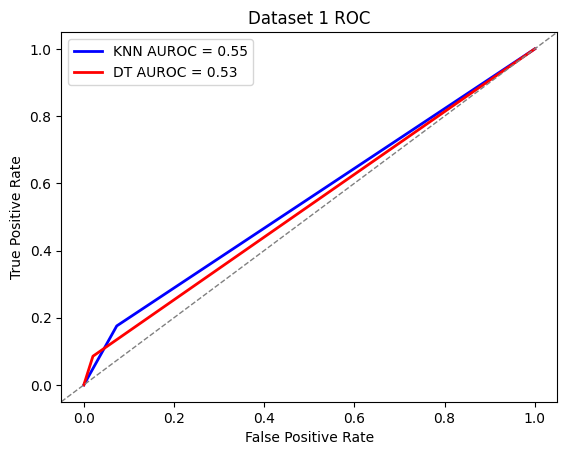

In [ ]:
#KNN

myK = 5
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

model = KNN(K=myK, distance_fn=euclidean)

y_pred = model.fit(x_train_1, y_train_1).predict(x_test_1)

# This step is converting y_test from one-hot encoding back to class index
y_test_indices = np.argmax(y_test_1, axis=1)

test_accuracy_knn = np.sum(y_pred == y_test_indices) / len(y_test_indices)

false_knn, true_knn, thresholds = roc_curve(y_test_indices, y_pred)
roc_auc_knn = roc_auc_score(y_test_indices, y_pred)

cm = confusion_matrix(y_test_indices, y_pred)
print(cm)

print(test_accuracy_knn, roc_auc_knn)

#DT

TestTree = DT(feature_list_1, 3, 1, 0.08)
TestTree.fit(df1_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df1_test)
print(df1_test)
actual_list = df1_test.iloc[:,-1].to_list()

category_mapping = {"Adult": 0, "Senior": 1}

# Convert the list using the mapping
print(prediction_list)
print(actual_list)
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]

print(prediction_list_binary)
print(actual_list_binary)

test_accuracy_dt = np.sum(np.array(prediction_list) == np.array(actual_list)) / len(actual_list)

cm = confusion_matrix(actual_list, prediction_list)
print(cm)


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)

print(test_accuracy_dt, roc_auc_dt)

plt.clf()
plt.plot(false_knn, true_knn, "b-", lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn)
plt.plot(false_dt, true_dt, "r-", lw=2, label="DT AUROC = %0.2f"%roc_auc_dt)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 1 ROC')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

# Experiment 1: Dataset 2

[[55  5]
 [ 3 90]]
0.9477124183006536 0.9422043010752688
{'Uniformity_of_cell_shape': 1, 'Clump_thickness': 2, 'Uniformity_of_cell_size': 2}
     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
420                3                        2                         2   
421               10                       10                        10   
422                4                        3                         3   
425                9                       10                        10   
426                5                        3                         6   
..               ...                      ...                       ...   
693                3                        1                         1   
694                3                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4              

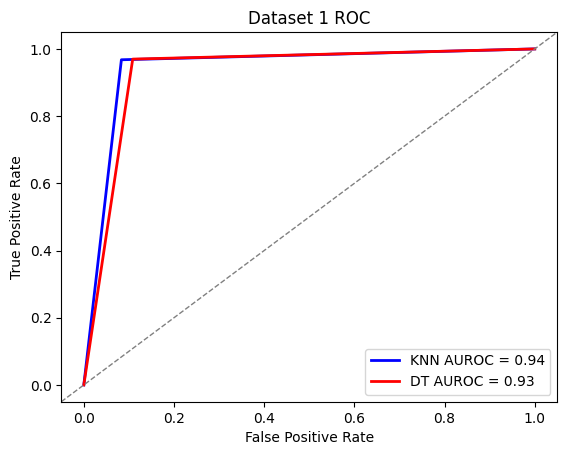

In [ ]:
#KNN

myK = 11
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

model = KNN(K=myK, distance_fn=euclidean)

y_pred = model.fit(x_train_2, y_train_2).predict(x_test_2)

# This step is converting y_test from one-hot encoding back to class index
y_test_indices = np.argmax(y_test_2, axis=1)

test_accuracy_knn = np.sum(y_pred == y_test_indices) / len(y_test_indices)

false_knn, true_knn, thresholds = roc_curve(y_test_indices, y_pred)
roc_auc_knn = roc_auc_score(y_test_indices, y_pred)

cm = confusion_matrix(y_test_indices, y_pred)
print(cm)

print(test_accuracy_knn, roc_auc_knn)

#DT

TestTree = DT(feature_list_2, 4, 1, 0.08)
TestTree.fit(df2_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df2_test)
print(df2_test)
actual_list = df2_test.iloc[:,-1].to_list()

category_mapping = {2: 0, 4: 1}

# Convert the list using the mapping
print(prediction_list)
print(actual_list)
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]

print(prediction_list_binary)
print(actual_list_binary)

test_accuracy_dt = np.sum(np.array(prediction_list) == np.array(actual_list)) / len(actual_list)

cm = confusion_matrix(actual_list, prediction_list)
print(cm)


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)

print(test_accuracy_dt, roc_auc_dt)

plt.clf()
plt.plot(false_knn, true_knn, "b-", lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn)
plt.plot(false_dt, true_dt, "r-", lw=2, label="DT AUROC = %0.2f"%roc_auc_dt)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 1 ROC')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

#Experiment 2: K Value for KNN Dataset 1

K = 1, Validation Accuracy = 80.59%
K = 2, Validation Accuracy = 80.59%
K = 3, Validation Accuracy = 84.18%
K = 4, Validation Accuracy = 84.71%
K = 5, Validation Accuracy = 86.04%
K = 6, Validation Accuracy = 85.77%
K = 7, Validation Accuracy = 84.97%
K = 8, Validation Accuracy = 84.97%
K = 9, Validation Accuracy = 84.97%
K = 10, Validation Accuracy = 85.37%
K = 11, Validation Accuracy = 84.31%
K = 12, Validation Accuracy = 84.84%
K = 13, Validation Accuracy = 84.18%
K = 14, Validation Accuracy = 84.44%
K = 15, Validation Accuracy = 84.84%
K = 16, Validation Accuracy = 84.84%
K = 17, Validation Accuracy = 84.71%
K = 18, Validation Accuracy = 84.57%
K = 19, Validation Accuracy = 84.71%
K = 20, Validation Accuracy = 84.44%
K = 21, Validation Accuracy = 84.18%
K = 22, Validation Accuracy = 84.31%
K = 23, Validation Accuracy = 84.18%
K = 24, Validation Accuracy = 84.31%
K = 25, Validation Accuracy = 84.04%
K = 26, Validation Accuracy = 84.18%
K = 27, Validation Accuracy = 84.18%
K = 28, Va

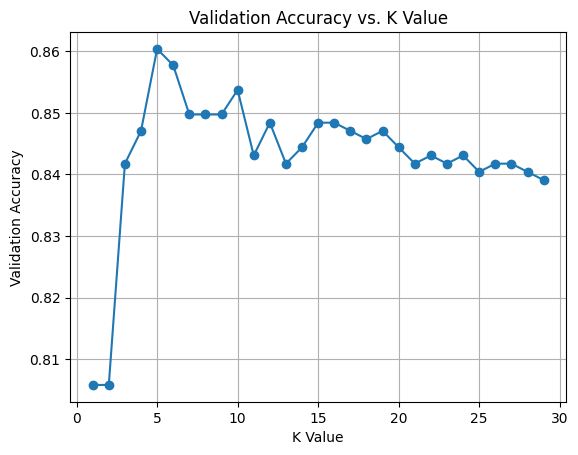

In [ ]:
best_k = None
best_accuracy = 0
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

# Convert y_validate from one-hot encoding to class indices if necessary
y_validate_indices = np.argmax(y_validate_1, axis=1)

k_values = []
accuracy_values = []

# Try different values of K
for K in range(1, 30):  # Assuming we are testing K from 1 to 29
    model = KNN(K=K, distance_fn=euclidean)
    model.fit(x_train_1, y_train_1)
    y_pred = model.predict(x_validate_1)

    # Calculate validation accuracy
    validation_accuracy = np.sum(y_pred == y_validate_indices) / len(y_validate_indices)
    print(f'K = {K}, Validation Accuracy = {validation_accuracy * 100:.2f}%')

    k_values.append(K)
    accuracy_values.append(validation_accuracy)

    # Update best K if current accuracy is better
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_k = K


print(f'Best K: {best_k} with Validation Accuracy: {best_accuracy * 100:.2f}%')

plt.plot(k_values, accuracy_values, marker='o')
plt.title('Validation Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Experiment 2: K Value for KNN Dataset 2

K = 1, Validation Accuracy = 93.92%
K = 2, Validation Accuracy = 93.92%
K = 3, Validation Accuracy = 95.95%
K = 4, Validation Accuracy = 95.95%
K = 5, Validation Accuracy = 96.62%
K = 6, Validation Accuracy = 96.62%
K = 7, Validation Accuracy = 97.30%
K = 8, Validation Accuracy = 96.62%
K = 9, Validation Accuracy = 96.62%
K = 10, Validation Accuracy = 97.30%
K = 11, Validation Accuracy = 97.97%
K = 12, Validation Accuracy = 96.62%
K = 13, Validation Accuracy = 96.62%
K = 14, Validation Accuracy = 96.62%
K = 15, Validation Accuracy = 96.62%
K = 16, Validation Accuracy = 96.62%
K = 17, Validation Accuracy = 96.62%
K = 18, Validation Accuracy = 96.62%
K = 19, Validation Accuracy = 95.95%
K = 20, Validation Accuracy = 95.95%
K = 21, Validation Accuracy = 95.95%
K = 22, Validation Accuracy = 95.95%
K = 23, Validation Accuracy = 95.95%
K = 24, Validation Accuracy = 95.95%
K = 25, Validation Accuracy = 95.95%
K = 26, Validation Accuracy = 96.62%
K = 27, Validation Accuracy = 95.95%
K = 28, Va

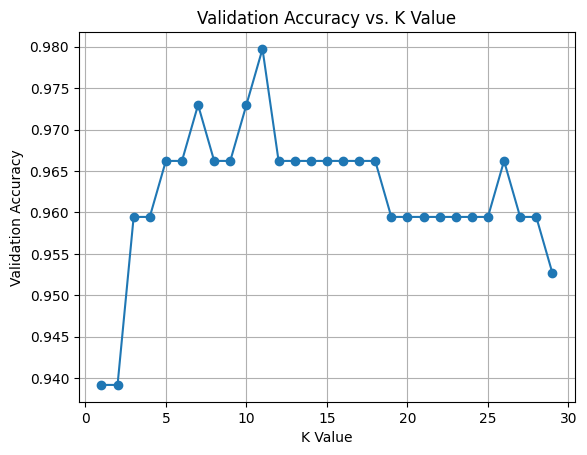

In [ ]:
best_k = None
best_accuracy = 0
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

# Convert y_validate from one-hot encoding to class indices if necessary
y_validate_indices = np.argmax(y_validate_2, axis=1)

k_values = []
accuracy_values = []

# Try different values of K
for K in range(1, 30):  # Assuming we are testing K from 1 to 29
    model = KNN(K=K, distance_fn=euclidean)
    model.fit(x_train_2, y_train_2)
    y_pred = model.predict(x_validate_2)

    # Calculate validation accuracy
    validation_accuracy = np.sum(y_pred == y_validate_indices) / len(y_validate_indices)
    print(f'K = {K}, Validation Accuracy = {validation_accuracy * 100:.2f}%')

    k_values.append(K)
    accuracy_values.append(validation_accuracy)

    # Update best K if current accuracy is better
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_k = K


print(f'Best K: {best_k} with Validation Accuracy: {best_accuracy * 100:.2f}%')

plt.plot(k_values, accuracy_values, marker='o')
plt.title('Validation Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Experiment 3: Choose the best hyperparameters for DT for Dataset1

In [ ]:
#dataset1
best_hyperparameters_1 = validate(df1_train,df1_validate,feature_list_1)
print("Best hps for dataset 1:", best_hyperparameters_1)
print("Has an accuracy of:", eval_acc(df1_train,df1_test,feature_list_1,best_hyperparameters_1[0],best_hyperparameters_1[1],best_hyperparameters_1[2]))

#dataset1
print(eval_acc(df1_train,df1_test,feature_list_1, max_depth=3,min_split=1,min_gini=0.08))

Best hps for dataset 1: (3, 1, 0.08)
Has an accuracy of: 0.8421052631578947
0.8421052631578947


# Experiment 3: Choose the best hyperparameters for DT for Dataset2

In [ ]:
#dataset2
best_hyperparameters_2 = validate(df2_train,df2_validate,feature_list_2)
print("Best hps for dataset 2:", best_hyperparameters_2)
print("Has an accuracy of:", eval_acc(df2_train,df2_test,feature_list_2,best_hyperparameters_2[0],best_hyperparameters_2[1],best_hyperparameters_2[2]))

Best hps for dataset 2: (4, 1, 0.08)
Has an accuracy of: 0.9261744966442953


# Experiment 4: Different distance function for KNN

Euclidean
0.9477124183006536
0.9500000000000001
Hamming
0.9084967320261438
0.9147058823529413


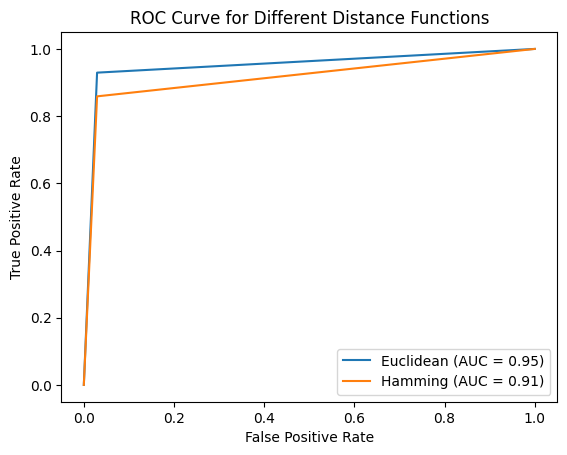

In [ ]:
myK = 11

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
hamming = lambda x1, x2: np.sum(x1 != x2, axis=-1)

distance_functions = [euclidean, hamming]
labels = ['Euclidean', 'Hamming']

for distance_function, label in zip(distance_functions, labels):
  print(label)
  model = KNN(myK, distance_function)

  y_pred = model.fit(x_train_2, y_train_2).predict(x_test_2)

  # This step is converting y_test from one-hot encoding back to class index
  y_test_indices = np.argmax(y_test_2, axis=1)

  test_accuracy = np.sum(y_pred == y_test_indices) / len(y_test_indices)
  print(test_accuracy)

  false_knn_all_features, true_knn_all_features, thresholds = roc_curve(y_test_indices, y_pred)
  roc_auc_knn_all_features = roc_auc_score(y_test_indices, y_pred)
  print(roc_auc_knn_all_features)

  plt.plot(false_knn_all_features, true_knn_all_features, label=f'{label} (AUC = {roc_auc_knn_all_features:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Distance Functions')
plt.legend()
plt.show()

# Experiment 4: Different cost function for DT

In [ ]:
class DTNode:
    def __init__(self, data, p = None, l = None, r = None, feat = None, threshold = None):
        self.data = data
        self.l = l
        self.r = r
        self.p = p
        self.feat = feat
        self.threshold = threshold
        self.predicted_class = None
        self.confidence = None
    def get_split_data(self):
        # splits data according to the specified feature and threshold
        data_l = self.data[self.data[self.feat] < self.threshold]
        data_r = self.data[self.data[self.feat] >= self.threshold]
        return data_l, data_r
    def get_gini(self): # gini impurity of the dataset contained in the node
        y = self.data.iloc[:,-1]
        # print(y)
        class_counts = y.value_counts()
        probs = class_counts / len(y)
        gini = 1- sum(probs*probs)
        return gini
    def get_weighted_gini(self): #gini weighted on sample size, useful for calculation
        y = self.data.iloc[:,-1]
        class_counts = y.value_counts()
        probs = class_counts / len(y)
        gini = 1- sum(probs**2)
        return gini * self.get_data_size()

    def get_entropy(self):
        y = self.data.iloc[:,-1]
        class_counts = y.value_counts()
        probs = class_counts / len(y)
        cost = -sum(probs * np.log2(probs + 1e-10))
        return cost * self.get_data_size()

    def get_data_size(self):
        return self.data.shape[0]

class DT_entropy_cost:
    def __init__(self, feature_list, max_depth = 64, min_split = 3, min_gini = 0.02):
        #self.find_best_split(self.root)
        self.feature_list = feature_list
        self.max_depth= max_depth
        self.min_split = min_split
        self.min_gini = min_gini
        self.feature_non_lead_count_dict = {}
    def fit(self, data):
        self.root = DTNode(data)
        self.build_tree(self.root,1)
    def predict(self, data):
        # returns a list of expected target values for the input dataset
        prediction_list = []
        for row_pos in range(data.shape[0]):
            prediction_list.append(self.predict_row(data.iloc[row_pos], self.root))
        return prediction_list
    def predict_row(self, row, node):
        if node.l is None and node.r is None:
            return node.predicted_class # if node is leaf node, return prediction based on most common target value
        else:
            if row[node.feat] < node.threshold: # recursively traverse the tree until a leaf node
                return self.predict_row(row, node.l) if node.l is not None else self.predict_row(row, node.r)
            else:
                return self.predict_row(row, node.r) if node.r is not None else self.predict_row(row, node.l)
    def build_tree(self, node, depth):
        if node.get_data_size() <= self.min_split or depth > self.max_depth or node.get_gini() <= self.min_gini:
            node.l = None
            node.r = None
            y = node.data.iloc[:,-1]
            node.predicted_class = y.mode()[0]
            return
        else:
            best_feature, best_threshold = self.find_best_split(node, self.feature_list)
            if best_feature in self.feature_non_lead_count_dict:
              self.feature_non_lead_count_dict[best_feature] += 1
            else:
              self.feature_non_lead_count_dict[best_feature] = 1
            l,r = self.split_node(node,best_feature,best_threshold)
            self.build_tree(l, depth + 1)
            self.build_tree(r, depth + 1)
            node.l = l
            node.r = r
            return
    def find_best_split(self, node, feature_list):
        best_cost = 99999999
        for feature in feature_list:
            for threshold in np.arange(node.data[feature].min(), node.data[feature].max(), 0.5):
                temp_node = DTNode(node.data,feat = feature,threshold = threshold)
                temp_node.l = DTNode(temp_node.get_split_data()[0])
                temp_node.r = DTNode(temp_node.get_split_data()[1])
                # calculate weighted average of gini impurities of both children as the cost
                #cost = (temp_node.l.get_weighted_gini() + temp_node.r.get_weighted_gini()) / (temp_node.get_data_size())
                cost = (temp_node.l.get_entropy() + temp_node.r.get_entropy()) / (temp_node.get_data_size())
                if cost < best_cost:
                    best_cost = cost
                    best_feature = feature
                    best_threshold = threshold
        return best_feature,best_threshold
    def split_node(self,node,feat,threshold):
        node.feat = feat
        node.threshold = threshold
        split_data_l, split_data_r = node.get_split_data()
        l = DTNode(split_data_l) if split_data_l.shape[0] > 0 else None
        r = DTNode(split_data_r) if split_data_r.shape[0] > 0 else None
        return l, r


def eval_acc(training_data,test_data,feature_list, max_depth = 64, min_split = 1, min_gini = 0.05):
    correct_predictions = 0
    TestTree = DT(feature_list = feature_list, max_depth = max_depth, min_split=min_split, min_gini=min_gini)
    TestTree.fit(training_data)
    prediction_list = TestTree.predict(test_data)
    actual_list = test_data.iloc[:,-1].to_list()
    for i in range(len(prediction_list)):
        if prediction_list[i] == actual_list[i]:
            correct_predictions += 1
    return correct_predictions / len(prediction_list)

def validate(training_data,validation_data,feature_list): # due to the high number of hyperparameters, this can be very slow. min_gini not validated and output not printed for brevity.
    best_acc = 0
    #for max_depth in range(1,15):
    for max_depth in range(1,10):
      #for min_split in range(1,7):
        for min_split in range(1,5):
            # for min_gini in np.arange(0.0,0.2,0.02):
            acc = eval_acc(training_data,validation_data,feature_list,max_depth,min_split,0.08)
            if acc > best_acc:
                best_acc = acc
                best_depth = max_depth
                best_split = min_split
                best_gini = 0.08
    return best_depth,best_split,best_gini

In [ ]:
TestTree = DT_entropy_cost(feature_list_2, 3, 1, 0.08)
TestTree.fit(df2_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df2_test)
actual_list = df2_test.iloc[:,-1].to_list()

category_mapping = {2: 0, 4: 1}

# Convert the list using the mapping
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)

print(roc_auc_dt)

{'Uniformity_of_cell_shape': 1, 'Clump_thickness': 1, 'Uniformity_of_cell_size': 2, 'Mitoses': 1}
0.9366557137641476


# Experiment 5: Plot the ROC for KNN and DT on the test data: Dataset 1

0.8
{'LBXGLT': 3, 'LBXIN': 2, 'LBXGLU': 1, 'BMXBMI': 1}
     RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0         2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1         2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2         1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3         1.0     2.0    28.9   104.0     2.0    84.0  16.15     Adult
4         2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult
..        ...     ...     ...     ...     ...     ...    ...       ...
755       1.0     1.0    22.7   107.0     2.0    82.0   5.28     Adult
756       1.0     2.0    19.3    96.0     2.0    80.0   2.95    Senior
757       2.0     2.0    36.1   101.0     2.0    99.0  30.31     Adult
758       2.0     2.0    20.3   103.0     2.0    91.0   8.25     Adult
759       1.0     2.0    25.8    92.0     2.0    98.0  16.09     Adult

[760 rows x 8 columns]
['Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adu

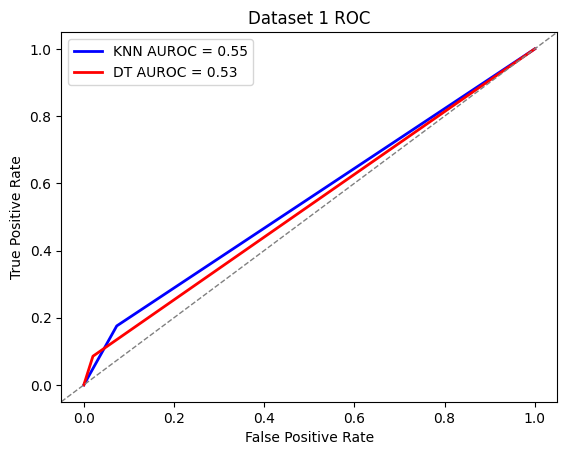

In [ ]:
#KNN

myK = 5
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

model = KNN(K=myK, distance_fn=euclidean)

y_pred = model.fit(x_train_1, y_train_1).predict(x_test_1)

# This step is converting y_test from one-hot encoding back to class index
y_test_indices = np.argmax(y_test_1, axis=1)

test_accuracy = np.sum(y_pred == y_test_indices) / len(y_test_indices)
print(test_accuracy)

false_knn, true_knn, thresholds = roc_curve(y_test_indices, y_pred)
roc_auc_knn = roc_auc_score(y_test_indices, y_pred)

#DT

TestTree = DT(feature_list_1, 3, 1, 0.08)
TestTree.fit(df1_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df1_test)
print(df1_test)
actual_list = df1_test.iloc[:,-1].to_list()

category_mapping = {"Adult": 0, "Senior": 1}

# Convert the list using the mapping
print(prediction_list)
print(actual_list)
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)

plt.clf()
plt.plot(false_knn, true_knn, "b-", lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn)
plt.plot(false_dt, true_dt, "r-", lw=2, label="DT AUROC = %0.2f"%roc_auc_dt)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 1 ROC')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

# Experiment 5: Plot the ROC for KNN and DT on the test data: Dataset 2

{'Uniformity_of_cell_shape': 1, 'Clump_thickness': 2, 'Uniformity_of_cell_size': 2}


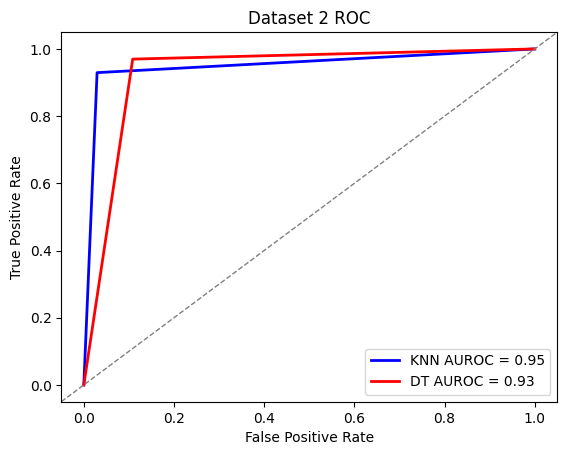

In [ ]:
#KNN

myK = 11
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

model = KNN(K=myK, distance_fn=euclidean)

y_pred = model.fit(x_train_2, y_train_2).predict(x_test_2)

# This step is converting y_test from one-hot encoding back to class index
y_test_indices = np.argmax(y_test_2, axis=1)

false_knn, true_knn, thresholds = roc_curve(y_test_indices, y_pred)
roc_auc_knn = roc_auc_score(y_test_indices, y_pred)


#DT

TestTree = DT(feature_list_2, 4, 1, 0.08)
TestTree.fit(df2_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df2_test)
actual_list = df2_test.iloc[:,-1].to_list()

category_mapping = {2: 0, 4: 1}

# Convert the list using the mapping
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)

plt.clf()
plt.plot(false_knn, true_knn, "b-", lw=2, label="KNN AUROC = %0.2f"%roc_auc_knn)
plt.plot(false_dt, true_dt, "r-", lw=2, label="DT AUROC = %0.2f"%roc_auc_dt)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 2 ROC')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

# Experiment 6: Key Features of KNN

In [ ]:
myK = 5
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

model = KNN(K=myK, distance_fn=euclidean)

y_pred = model.fit(x_train_1, y_train_1).predict(x_test_1)

# This step is converting y_test from one-hot encoding back to class index
y_test_indices = np.argmax(y_test_1, axis=1)

test_accuracy = np.sum(y_pred == y_test_indices) / len(y_test_indices)
print(test_accuracy)

false_knn_all_features, true_knn_all_features, thresholds = roc_curve(y_test_indices, y_pred)
roc_auc_knn_all_features = roc_auc_score(y_test_indices, y_pred)
print(roc_auc_knn_all_features)



model = KNN(K=myK, distance_fn=euclidean)

y_pred = model.fit(x_train_1_sf, y_train_1_sf).predict(x_test_1_sf)

# This step is converting y_test from one-hot encoding back to class index
y_test_indices = np.argmax(y_test_1_sf, axis=1)

test_accuracy = np.sum(y_pred == y_test_indices) / len(y_test_indices)
print(test_accuracy)

false_knn, true_knn, thresholds = roc_curve(y_test_indices, y_pred)
roc_auc_knn = roc_auc_score(y_test_indices, y_pred)
print(roc_auc_knn)

0.8
0.5512955763121711
0.824516129032258
0.5812491109952113


# Experiment 7

In [ ]:
#Dataset 1 Important Features

TestTree = DT(feature_list_1, 4, 1, 0.08)
TestTree.fit(df1_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df1_test)
actual_list = df1_test.iloc[:,-1].to_list()

category_mapping = {'Adult': 0, 'Senior': 1}

# Convert the list using the mapping
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)



#Dataset 2 Important Features

TestTree = DT(feature_list_2, 5, 1, 0.05)
TestTree.fit(df2_train)
features_dict = TestTree.feature_non_lead_count_dict
print(features_dict)
prediction_list = TestTree.predict(df2_test)
actual_list = df2_test.iloc[:,-1].to_list()

category_mapping = {2: 0, 4: 1}

# Convert the list using the mapping
prediction_list_binary = [category_mapping[category] for category in prediction_list]
actual_list_binary = [category_mapping[category] for category in actual_list]


false_dt, true_dt, thresholds = roc_curve(actual_list_binary, prediction_list_binary)
roc_auc_dt = roc_auc_score(actual_list_binary, prediction_list_binary)


{'LBXGLT': 5, 'LBXIN': 4, 'PAQ605': 1, 'LBXGLU': 2, 'BMXBMI': 1, 'DIQ010': 1}
{'Uniformity_of_cell_shape': 1, 'Clump_thickness': 2, 'Uniformity_of_cell_size': 2, 'Bland_chromatin': 1, 'Mitoses': 1}
